<a href="https://colab.research.google.com/github/parhamvs/Naive-Bayes-From-Scratch/blob/main/Naive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import time
from sklearn import metrics
import re
import collections
from nltk.corpus import stopwords
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import Perceptron
from sklearn import decomposition, ensemble
from sklearn.feature_selection import mutual_info_classif
from sklearn.utils import shuffle
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
import numpy as np
from sklearn.feature_extraction import text 
import matplotlib.pyplot as plt
import math
from google.colab import drive  
import cv2
import csv
import seaborn as sn
from nltk.stem import PorterStemmer
from nltk import word_tokenize   
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
drive.mount('/content/gdrive')
!pwd
%cd 'gdrive/My Drive'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive
[Errno 2] No such file or directory: 'gdrive/My Drive'
/content/gdrive/My Drive


In [ ]:
class StemTokenizer:
     def __init__(self):
       self.wnl =PorterStemmer()
     def __call__(self, doc):
       return [self.wnl.stem(t) for t in word_tokenize(doc) if t.isalpha()]

In [ ]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
class New_LemmaTokenizer:
     def __init__(self):
       self.wnl = WordNetLemmatizer()
     def __call__(self, doc):
       return [self.wnl.lemmatize(t,pos =get_wordnet_pos(t)) for t in word_tokenize(doc) if t.isalpha()]

In [ ]:
class BernouliNaiveBayes:
  def __init__(self):

    pass
  def decode_class(self, a):
    for i in range(len(a)):
      if a[i] == 0:
        a[i] = "Telegram"
      elif a[i] == 1:
        a[i] = "Facebook"
      elif a[i] == 2:
        a[i] = "Instagram"
      elif a[i] == 3: 
        a[i] = "Linkedin"
      elif a[i] == 4:
        a[i] = "viber"
    return a
  def cal_theta(self, X, df_y,a):
    l = ['Telegram','Facebook','Instagram','Linkedin','viber']
    theta_k = []
    theta_j_k = []
    for cat in l:
      value0 = (df_y==cat).sum()/float(df_y.shape[0])
      theta_k.append(value0)
      jk_temp = []
      for j in range (X.shape[1]):
        value1= (X[df_y==str(cat), j].sum() + a)/(float((df_y==cat).sum()) +a*2)
        jk_temp.append(value1)
      theta_j_k.append(jk_temp)
    return theta_k, theta_j_k
  def class_prob( X, theta_k, theta_jk):
    num_features = X.shape[0]
    class_probability = []
    for k in range(len(theta_k)):
      feature_likelihood = 0
      feature_likelihood = np.dot(X,np.log(theta_jk[k])) + np.dot((1-X), np.log(1-theta_jk[k]))
#Vectorization
      feature_likelihood = np.sum(feature_likelihood) #Vectorization
      class_prob = feature_likelihood + np.log(theta_k[k])
      class_probability.append(class_prob)
    return np.argmax(class_probability)
  def accuracy_rate(self, actual, predictions):
    correct = 0
    for i in range(len(actual)):
      if actual[i] == predictions[i]:
        correct += 1
    incorrect = len(actual) - correct
    print("Total samples:", len(actual))
    print("Correct classifications:", correct)
    print("Missclassifications:", incorrect)
    return (correct / float(len(actual))) * 100.0
  def predict(self, test_data, theta_k, theta_jk):
    num_samples = len(test_data)
    predictions = []
    for i in range (num_samples):
      class_prediction = 0
      class_prediction = BernouliNaiveBayes.class_prob(test_data[i], theta_k, theta_jk)
      predictions.append(class_prediction)
    return predictions

In [ ]:
def clean (text):
  return re.sub('[^a-zA-Z]', ' ', text)

In [ ]:
#Reading data
df_train = pd.read_csv('train.csv', encoding= 'unicode_escape')
df_test= pd.read_csv('test.csv', encoding= 'cp437')
# df_train = df_train.drop_duplicates(subset=['body'])
# df_train = df_train.sample(frac=1)
df_train.head()
# df_test.head()
# df_train.shape
# np.unique(y)

,body,subreddit
0,So lads I was wondering why doesn't Telegram b...,Telegram
1,"Same issue here, can?t access on my iphone xs ...",Telegram
2,"I had the same issue, and it seems the only wa...",Telegram
3,"Channels aren't the same thing as groups, whic...",Telegram
4,"I noticed this too, I had a few bots that were...",Telegram


In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
df_train['body'] = df_train['body'].apply(lambda text: remove_urls(text))
df_test['body'] = df_test['body'].apply(lambda text: remove_urls(text))

In [ ]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
df_train['body'] = df_train['body'].apply(lambda text: remove_html(text))
df_test['body'] = df_test['body'].apply(lambda text: remove_html(text))

In [ ]:
#df_train['body'] = df_train['body'].apply(str.lower)
df_train['body'] = df_train['body'].apply(clean)
#df_test['body'] = df_test['body'].apply(str.lower)
df_test['body'] = df_test['body'].apply(clean)

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
', '.join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
# STOPWORDS.append('account', 'get','com','people','help','contact')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df_train['body'] = df_train['body'].apply(lambda text: remove_stopwords(text))
df_test['body'] = df_test['body'].apply(lambda text: remove_stopwords(text))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from collections import Counter
cnt = Counter()
for text in df_train['body'].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)

[('I', 4092),
 ('account', 555),
 ('get', 485),
 ('like', 443),
 ('Viber', 351),
 ('know', 350),
 ('people', 346),
 ('see', 342),
 ("I'm", 322),
 ('still', 311)]

In [ ]:
def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove
df_train['body'] = df_train['body'].apply(lambda text: remove_num(text))
df_test['body'] = df_test['body'].apply(lambda text: remove_num(text))

In [ ]:
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
df_train['body'] = df_train['body'].apply(lambda x: remove_mention(x))
df_test['body'] = df_test['body'].apply(lambda x: remove_mention(x))
# def remove_hash(x):
#     text=re.sub(r'#\w+','',x)
#     return text
# df_train['body'] = df_train['body'].apply(lambda x: remove_hash(x))
# df_test['body'] = df_test['body'].apply(lambda x: remove_hash(x))

In [ ]:
def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove
df_train['body'] = df_train['body'].apply(lambda text: remove_space(text))
df_test['body'] = df_test['body'].apply(lambda text: remove_space(text))

In [ ]:
# n_rare_words = 1000
# RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
# def remove_rarewords(text):
#     """custom function to remove the rare words"""
#     return " ".join([word for word in str(text).split() if word not in RAREWORDS])

# df_train['body'] = df_train['body'].apply(lambda text: remove_rarewords(text))
# df_test['body'] = df_test['body'].apply(lambda text: remove_rarewords(text))
# df_train.head()


In [ ]:
# FREQWORDS = set([w for (w, wc) in cnt.most_common(2)])
# def remove_freqwords(text):
#     """custom function to remove the frequent words"""
#     return " ".join([word for word in str(text).split() if word not in FREQWORDS])

# df_train['body'] = df_train['body'].apply(lambda text: remove_freqwords(text))
# df_train.head()

In [ ]:
# #importing the Stemming function from nltk library
# from nltk.stem.porter import PorterStemmer
# #defining the object for stemming
# porter_stemmer = PorterStemmer()
# #defining a function for stemming
# def stemming(text):
#   stem_text = [porter_stemmer.stem(word) for word in text]
#   return stem_text
# df_train['body'] = df_train['body'].apply(lambda text: stemming(text))
# df_test['body'] = df_test['body'].apply(lambda text: stemming(text))


In [ ]:
# !pip install pyspellchecker
# from spellchecker import SpellChecker
# spelling = SpellChecker()
# def spelling_checks(text):
#     correct_result = []
#     typo_words = spelling.unknown(text.split())
#     for word in text.split():
#         if word in typo_words:
#             correct_result.append(spelling.correction(word))
#         else:
#             correct_result.append(word)
#     return " ".join(correct_result)
# df_train['body'] = df_train['body'].apply(lambda text: spelling_checks(text))
# df_test['body'] = df_test['body'].apply(lambda text: spelling_checks(text))

In [ ]:
X_train_init = df_train["body"].values
y_train_init = df_train["subreddit"].values
# X_shuffled,y_shuffled = shuffle(X, y, random_state=0)
X_test_init = df_test['body']
print(np.shape(X_train_init),np.shape(y_train_init),np.shape(X_test_init))
df_train.head()
df_test.head()

(1749,) (1749,) (698,)


,id,body
0,1,"firebase is included because of push iirc, but..."
1,2,change the forwarded messages preference to no...
2,3,Say if a conversation is like A wrote this and...
3,4,Perhaps try using a different gallery app? I s...
4,5,Lol why do you need a bot? Is it a hard thing ...


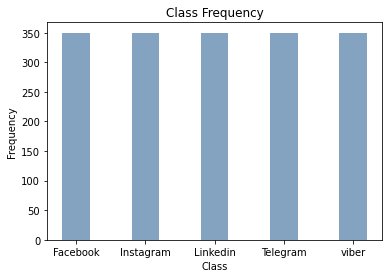

In [ ]:
unique, counts = np.unique(y_train_init, return_counts=True)
plt.bar(unique, counts, color=(0.2, 0.4, 0.6, 0.6), width = 0.4)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#raw data
vectorizer = CountVectorizer(binary=True)
normalizer = Normalizer()
vectors_train = vectorizer.fit_transform(X_train_init)
vectors_train = normalizer.transform(vectors_train)
vectors_test = vectorizer.transform(X_test_init)
vectors_test = normalizer.transform(vectors_test)
print(np.shape(vectors_train))
print(np.shape(vectors_test))
# print(vectors_train.todense())
# kbest = SelectKBest(mutual_info_classif, k = 3000)
# vectors_train = kbest.fit_transform(vectors_train, y_shuffled)
# vectors_test = kbest.transform(vectors_test)
# print(np.shape(vectors_train))

(1749, 7889)
(698, 7889)


TypeError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS
vectorizer = CountVectorizer(stop_words = my_stop_words,binary=True)
vectors_train_stop = vectorizer.fit_transform(X_train_init)
vectors_train_stop = normalizer.transform(vectors_train_stop)
vectors_test_stop = vectorizer.transform(X_test_init)
vectors_test_stop = normalizer.transform(vectors_test_stop)
print(np.shape(vectors_train_stop))
# print(np.shape(vectors_train_stop))
# kbest = SelectKBest(mutual_info_classif, k = 3000)
# vectors_train_stop = kbest.fit_transform(vectors_train, y_shuffled)
# vectors_test_stop = kbest.transform(vectors_test)
print(np.shape(vectors_train_stop))

(1749, 7610)
(1749, 7610)


In [ ]:
vectorizer = CountVectorizer(tokenizer=StemTokenizer(),binary=True,stop_words = my_stop_words)
vectors_train_stem = vectorizer.fit_transform(X_train_init)
vectors_train_stem= normalizer.transform(vectors_train_stem)
# vectors_test_stem = vectorizer.transform(X_test)
# vectors_test_stem = normalizer.transform(vectors_test_stem)
print(np.shape(vectors_train_stem))
# kbest = SelectKBest(mutual_info_classif, k = 3000)
# vectors_train_stem = kbest.fit_transform(vectors_train, y_shuffled)
# vectors_test_stem = kbest.transform(vectors_test)
print(np.shape(vectors_train_stem))
# print(np.shape(vectors_test_stem))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

(1749, 4783)
(1749, 4783)


In [ ]:
vectorizer = CountVectorizer(tokenizer=New_LemmaTokenizer(),binary=True,stop_words = my_stop_words)
vectors_train_Lemma = vectorizer.fit_transform(X_train_init)
vectors_train_Lemma = normalizer.transform(vectors_train_Lemma)
# vectors_test_Lemma = vectorizer.fit_transform(X_test)
# vectors_test_Lemma = normalizer.transform(vectors_test_Lemma)
print(np.shape(vectors_train_Lemma))
# kbest = SelectKBest(mutual_info_classif, k = 3000)
# vectors_train_Lemma = kbest.fit_transform(vectors_train, y_shuffled)
# vectors_test_idf = kbest.transform(vectors_test)
print(np.shape(vectors_train_Lemma))


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'u'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(1749, 5471)
(1749, 5471)


In [ ]:
vectorizer = CountVectorizer(tokenizer=StemTokenizer(),binary=True,stop_words=my_stop_words)
vectors_train_stem_stop = vectorizer.fit_transform(X_train_init)
vectors_train_stem_stop = normalizer.transform(vectors_train_stem_stop)
# vectors_test_stem_stop = vectorizer.transform(X_test)
# vectors_test_stem_stop = normalizer.transform(vectors_test_stem_stop)
# print(np.shape(vectors_train_stem_stop))
# kbest = SelectKBest(mutual_info_classif, k =3000)
# vectors_train_stem_stop = kbest.fit_transform(vectors_train_stem_stop, y_shuffled)
# vectors_test_stem_stop = kbest.transform(vectors_test_stem_stop)
print(np.shape(vectors_train_stem))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

(1749, 4783)


In [ ]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS
normalizer = Normalizer()
tf_idf_vectorizer = TfidfVectorizer(stop_words = 'english',binary=True, tokenizer=New_LemmaTokenizer())
#tf_idf_vectorizer = TfidfVectorizer(stop_words = my_stop_words,binary=True,max_features=3000)
vectors_train_idf = tf_idf_vectorizer.fit_transform(X_train_init)
vectors_train_idf = normalizer.transform(vectors_train_idf)
vectors_test_idf = tf_idf_vectorizer.transform(X_test_init)
vectors_test_idf = normalizer.transform(vectors_test_idf)
print(np.shape(vectors_train_idf))
print(np.shape(vectors_test_idf))
# print(np.shape(tf_idf_vectorizer.get_feature_names()))
kbest = SelectKBest(mutual_info_classif, k = 3000)
vectors_train_idf = kbest.fit_transform(vectors_train_idf, y_train_init)
vectors_test_idf = kbest.transform(vectors_test_idf)
# clf=RandomForestClassifier(n_estimators=150)
# scores = cross_val_score(clf, vectors_train_idf, y_train_init, cv=10)
# print(scores.mean())


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'u'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(1749, 5471)
(698, 5471)


In [ ]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS
normalizer = Normalizer()
tf_idf_vectorizer = TfidfVectorizer(stop_words = my_stop_words,binary=True,smooth_idf = False,ngram_range=(1,2),max_features=5000)
vectors_train_idf_ngram = tf_idf_vectorizer.fit_transform(X_train_init)
vectors_train_idf_ngram = normalizer.transform(vectors_train_idf_ngram)

In [ ]:
features=[('without feature selection',vectors_train),
          ("idf",vectors_train_idf),
          ('stemming',vectors_train_stem),
          ('lemma',vectors_train_Lemma),
          ('ngram',vectors_train_idf_ngram)]

In [ ]:
for f_name, f_instance in features:
    clf=RandomForestClassifier()
    scores = cross_val_score(clf, f_instance, y_train_init, cv=10)
    print("The accuracy of model %s with %s feature selection is %f" %(m_name,f_name, scores.mean()))

The accuracy of model knn with bagging with without feature selection feature selection is 0.852496
The accuracy of model knn with bagging with stop word feature selection is 0.874775
The accuracy of model knn with bagging with idf feature selection is 0.875356
The accuracy of model knn with bagging with stemming feature selection is 0.853642
The accuracy of model knn with bagging with lemma feature selection is 0.851928
The accuracy of model knn with bagging with Stem and Stop feature selection is 0.865077


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
models=[('naive bayes Bernouli', BernoulliNB()),
        ('naive bayes Multinomial',MultinomialNB()),
        ('knn', KNeighborsClassifier()),
        ('decision tree', DecisionTreeClassifier()),
        ('random forest',RandomForestClassifier()),
        ('svm linear', SVC(kernel='linear'))]

In [ ]:
for m_name,m_instance in models:
  for f_name, f_instance in features:
    clf=m_instance
    scores = cross_val_score(clf, f_instance, y_train_init, cv=10)
    print("The accuracy of model %s with %s feature selection is %f" %(m_name,f_name, scores.mean()))

The accuracy of model naive bayes Bernouli with without feature selection feature selection is 0.760440
The accuracy of model naive bayes Bernouli with idf feature selection is 0.816466
The accuracy of model naive bayes Bernouli with stemming feature selection is 0.791888
The accuracy of model naive bayes Bernouli with lemma feature selection is 0.805048
The accuracy of model naive bayes Bernouli with ngram feature selection is 0.755852
The accuracy of model naive bayes Multinomial with without feature selection feature selection is 0.795898
The accuracy of model naive bayes Multinomial with idf feature selection is 0.810755
The accuracy of model naive bayes Multinomial with stemming feature selection is 0.824493
The accuracy of model naive bayes Multinomial with lemma feature selection is 0.834775
The accuracy of model naive bayes Multinomial with ngram feature selection is 0.811327
The accuracy of model knn with without feature selection feature selection is 0.616929
The accuracy of 

In [ ]:
# X_train, X_test, y_train, y_test=train_test_split(vectors_train,y_shuffled,test_size=0.2, random_state=42)
# # vectors_test = vectorizer.fit_transform(X_test)
# # vectors_test = normalizer.transform(vectors_test)
# print(np.shape(X_train))
# print(np.shape(X_test))
# print(np.shape(y_train))
# X_train = X_train.toarray()
# X_train = np.array(X_train)
# X_test = X_test.toarray()
# X_test = np.array(X_test)

In [ ]:
import timeit
BNV_classifier = BernouliNaiveBayes()
start_time = timeit.default_timer()
theta_k, theta_jk = BNV_classifier.cal_theta(X_train, y_train,a=1)
end_time = timeit.default_timer()
theta_jk = np.array(theta_jk)
theta_k = np.array(theta_k)
a = BNV_classifier.predict(X_train, theta_k, theta_jk)
b = BNV_classifier.predict(X_test, theta_k, theta_jk)
a = BNV_classifier.decode_class(a)
b =BNV_classifier. decode_class(b)
print('Training accuracy:', metrics.accuracy_score(y_train, a))
print('Test accuracy:', metrics.accuracy_score(y_test, b))
end_time = timeit.default_timer()
exe_time = end_time - start_time
print("Execution time", exe_time)
print(metrics.recall_score(y_test, b, average='weighted'))
print(metrics.precision_score(y_test, b, average='weighted'))
print(metrics.classification_report(y_test, b))

AttributeError: ignored

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(vectors_train_idf,y_train_init,test_size=0.2, random_state=42)
# vectors_test = vectorizer.fit_transform(X_test)
# vectors_test = normalizer.transform(vectors_test)
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
X_train = X_train.toarray()
X_train = np.array(X_train)
X_test = X_test.toarray()
X_test = np.array(X_test)

(1399, 3000)
(350, 3000)
(1399,)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


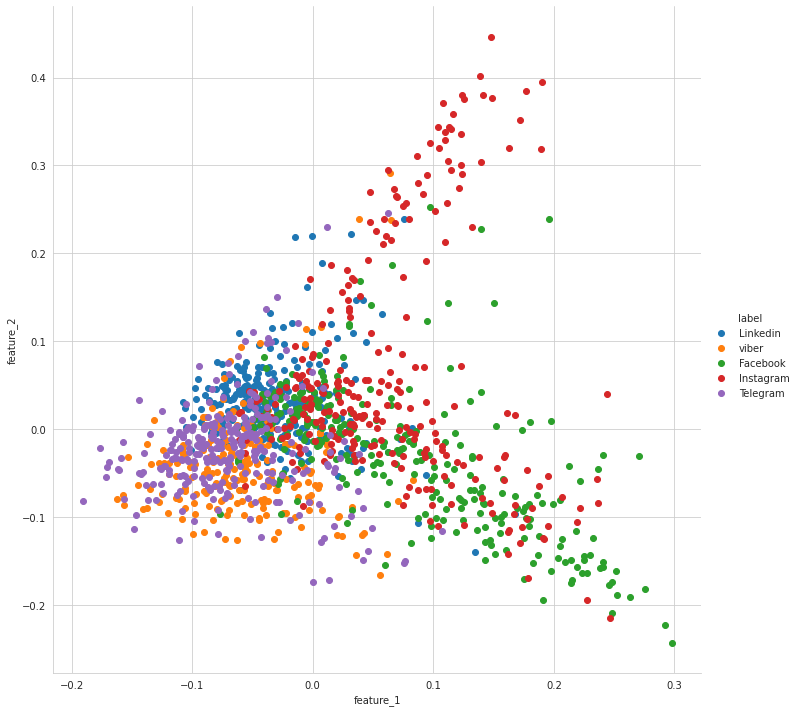

In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
proj = pca.fit_transform(X_train)
df = pd.DataFrame(dict(feature_2=proj[:, 1], feature_1=proj[:, 2], label = y_train))
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="label", size=10) \
   .map(plt.scatter, "feature_1", "feature_2") \
   .add_legend()
plt.show()



# fig, ax = plt.subplots()
# colors = {'Facebook':'red', 'Instagram':'green', 'Linkedin':'blue', 'Telegram':'yellow', 'viber':'black'}
# ax.scatter(df[], df[], c=df[].map(colors))

In [ ]:
import timeit
BNV_classifier = BernouliNaiveBayes()
start_time = timeit.default_timer()
theta_k, theta_jk = BNV_classifier.cal_theta(X_train, y_train,a=1)
end_time = timeit.default_timer()
theta_jk = np.array(theta_jk)
theta_k = np.array(theta_k)
a = BNV_classifier.predict(X_train, theta_k, theta_jk)
b = BNV_classifier.predict(X_test, theta_k, theta_jk)
a = BNV_classifier.decode_class(a)
b = BNV_classifier. decode_class(b)
print('Training accuracy:', metrics.accuracy_score(y_train, a))
print('Test accuracy:', metrics.accuracy_score(y_test, b))
end_time = timeit.default_timer()
exe_time = end_time - start_time
print("Execution time", exe_time)
print(metrics.recall_score(y_test, b, average='weighted'))
print(metrics.precision_score(y_test, b, average='weighted'))
print(metrics.classification_report(y_test, b))

Training accuracy: 0.9485346676197284
Test accuracy: 0.7828571428571428
Execution time 2.5801233920001323
0.7828571428571428
0.7937903218653825
              precision    recall  f1-score   support

    Facebook       0.78      0.71      0.74        69
   Instagram       0.70      0.81      0.75        73
    Linkedin       0.94      0.81      0.87        77
    Telegram       0.81      0.71      0.76        68
       viber       0.72      0.89      0.79        63

    accuracy                           0.78       350
   macro avg       0.79      0.78      0.78       350
weighted avg       0.79      0.78      0.78       350



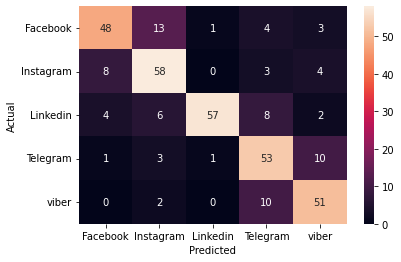

In [ ]:
data_of = {'y_Actual':    y_test,
        'y_Predicted': b
        }
df_of = pd.DataFrame(data_of, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_of['y_Actual'], df_of['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
import timeit
BNV_classifier = BernouliNaiveBayes()
start_time = timeit.default_timer()
theta_k, theta_jk = BNV_classifier.cal_theta(vectors_train_stop, y,a=1)
end_time = timeit.default_timer()
theta_jk = np.array(theta_jk)
theta_k = np.array(theta_k)
a = BNV_classifier.predict(vectors_test_stop, theta_k, theta_jk)
# b = BNV_classifier.predict(X_test, theta_k, theta_jk)
a = BNV_classifier.decode_class(a)
# b =BNV_classifier. decode_class(b)
# print('Training accuracy:', metrics.accuracy_score(y_train, a))
# print('Test accuracy:', metrics.accuracy_score(y_test, b))
end_time = timeit.default_timer()
exe_time = end_time - start_time
print("Execution time", exe_time)
# print(metrics.recall_score(y_test, b, average='weighted'))
# print(metrics.precision_score(y_test, b, average='weighted'))
# print(metrics.classification_report(y_test, b))

Execution time 9.328661683999599


In [ ]:
print(np.shape(vectors_train_idf),np.shape(vectors_test_idf))
vectors_train_idf = vectors_train_idf.toarray()
vectors_train_idf = np.array(vectors_train_idf)
vectors_test_idf = vectors_test_idf.toarray()
vectors_test_idf = np.array(vectors_test_idf)
np.shape(vectors_train_idf)

(1749, 3800) (698, 3800)


(1749, 3800)

In [ ]:
clf=RandomForestClassifier(n_estimators=150)
clf.fit(vectors_train_idf,y_train_init)
y_pred= clf.predict(vectors_test_idf)

In [ ]:
print(np.shape(y_pred))
y_pred

(698,)


array(['Telegram', 'Linkedin', 'Telegram', 'Telegram', 'Telegram',
       'viber', 'Linkedin', 'Telegram', 'Telegram', 'Telegram',
       'Facebook', 'Telegram', 'Telegram', 'Telegram', 'Telegram',
       'Telegram', 'Telegram', 'Telegram', 'Telegram', 'Telegram',
       'Telegram', 'Telegram', 'Telegram', 'Telegram', 'Telegram',
       'Telegram', 'Telegram', 'Telegram', 'Telegram', 'Telegram',
       'Telegram', 'Instagram', 'Linkedin', 'Telegram', 'Telegram',
       'Telegram', 'Telegram', 'Telegram', 'Telegram', 'Telegram',
       'Telegram', 'Linkedin', 'Telegram', 'Telegram', 'Telegram',
       'Telegram', 'Telegram', 'Telegram', 'Telegram', 'Telegram',
       'Telegram', 'viber', 'Telegram', 'Telegram', 'Telegram',
       'Telegram', 'Telegram', 'Telegram', 'Telegram', 'Telegram',
       'Telegram', 'Telegram', 'Telegram', 'Telegram', 'Telegram',
       'Telegram', 'Telegram', 'Telegram', 'Telegram', 'Telegram',
       'Telegram', 'Telegram', 'Telegram', 'Telegram', 'Telegram',


In [ ]:
id=np.arange(start=1, stop=699)
df = pd.DataFrame(list(zip(id, y_pred)),
               columns =['id', 'subreddit'])
df.to_csv('rf5.csv',index=False)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(vectors_train_stop,y_train_init,test_size=0.2, random_state=42)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Facebook       0.86      0.81      0.84        69
   Instagram       0.80      0.78      0.79        73
    Linkedin       0.95      0.92      0.93        77
    Telegram       0.71      0.91      0.80        68
       viber       0.98      0.81      0.89        63

    accuracy                           0.85       350
   macro avg       0.86      0.85      0.85       350
weighted avg       0.86      0.85      0.85       350



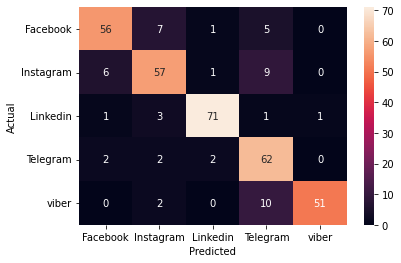

In [ ]:
data_of = {'y_Actual':    y_test,
        'y_Predicted': y_pred
        }
df_of = pd.DataFrame(data_of, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_of['y_Actual'], df_of['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()